In [1]:
import pandas as pd
import numpy as np

###Load Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mubeen161/AirBnB-Price-Prediction/main/AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###Missing Data

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.fillna({'name': 'NoName', 'host_name': 'NoName'}, inplace=True)
df['last_review'] = df.fillna( 'NotReviewed', inplace=True)
df['reviews_per_month']=df.fillna( 0, inplace=True)

In [11]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 48895
calculated_host_listings_count        0
availability_365                      0
dtype: int64

###Dealing with Categorical Data

In [12]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

### Data Visualization

In [13]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['neighbourhood_group', 'room_type'], **{})
chart

In [14]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['latitude', 'longitude'], **{})
chart

<Figure size 600x600 with 0 Axes>

In [15]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['latitude'], **{})
chart

In [16]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['longitude'], **{})
chart

In [17]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['host_id'], **{})
chart

In [18]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['price'], **{})
chart

In [19]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['host_id'], **{})
chart

In [20]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

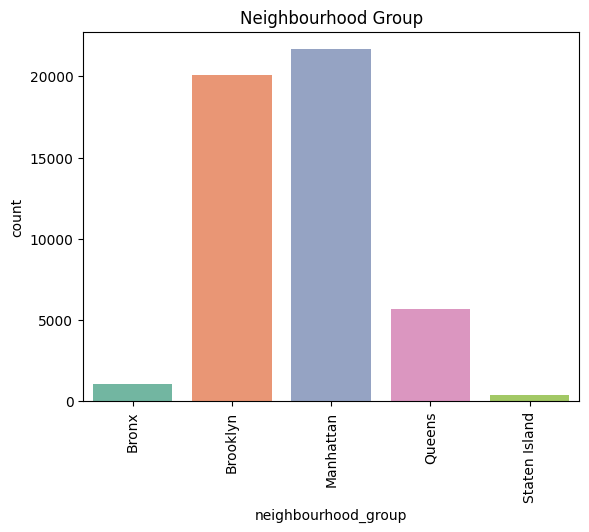

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='neighbourhood_group', palette='Set2')
plt.title('Neighbourhood Group')
plt.xticks(rotation=90)
plt.show()


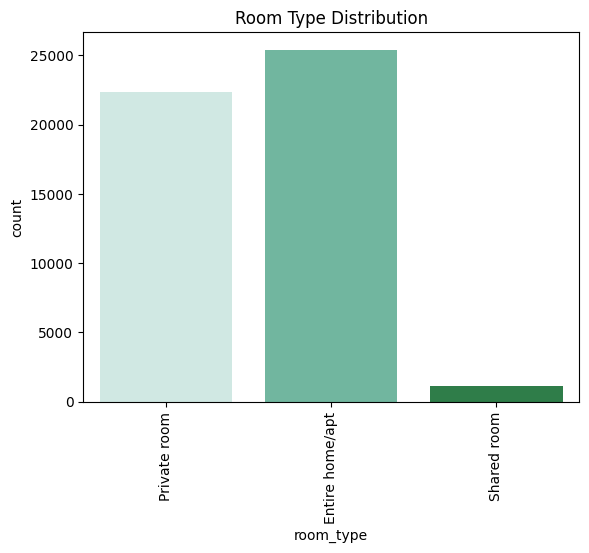

In [22]:
sns.countplot(data=df, x='room_type', palette='BuGn')
plt.title('Room Type Distribution')
plt.xticks(rotation=90)
plt.show()


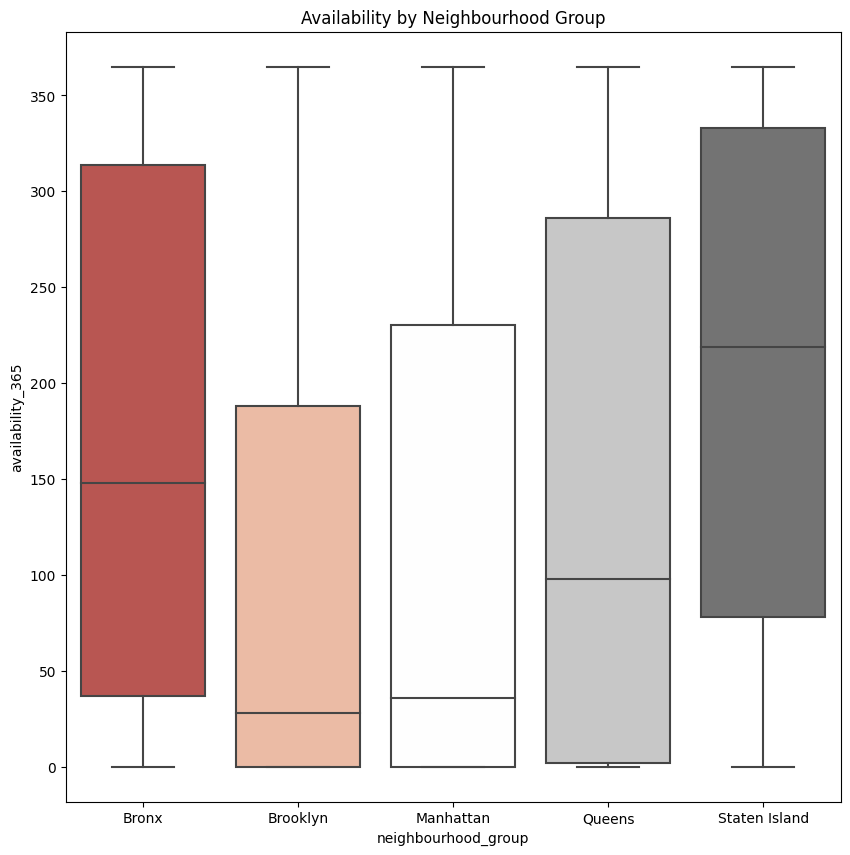

In [23]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='RdGy')
plt.title('Availability by Neighbourhood Group')
plt.show()


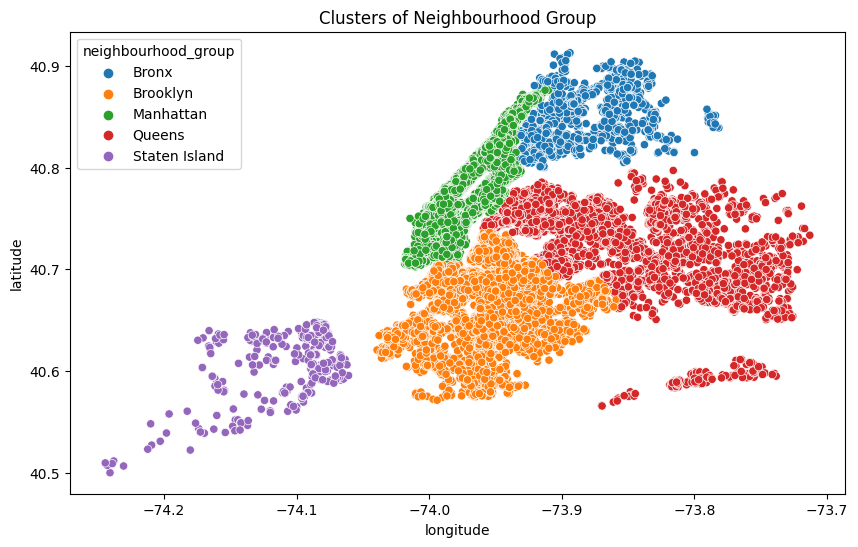

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title('Clusters of Neighbourhood Group')
plt.ioff()

plt.show()


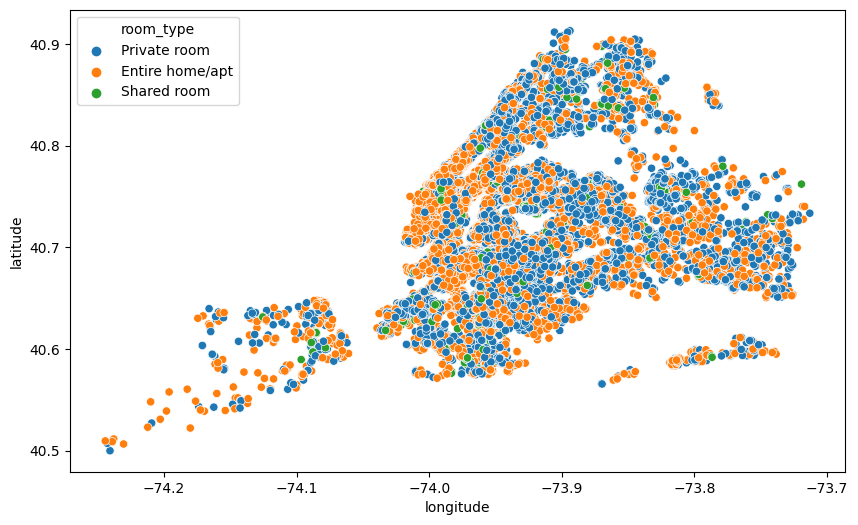

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.ioff()
plt.show()


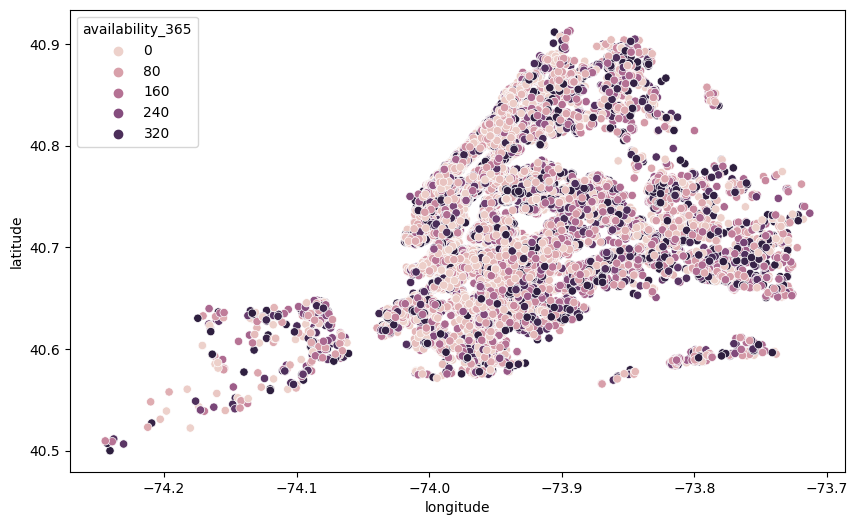

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.availability_365)
plt.ioff()

plt.show()


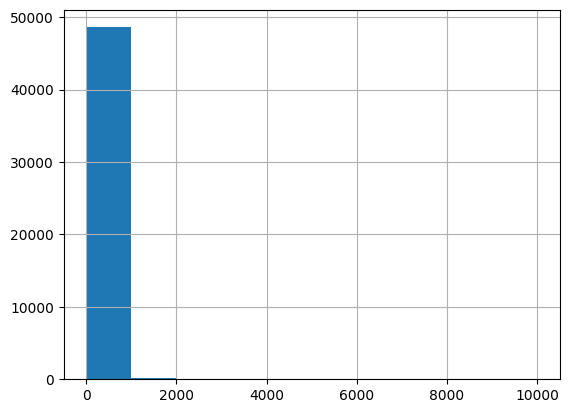

In [27]:
hist_price = df["price"].hist()
plt.show()

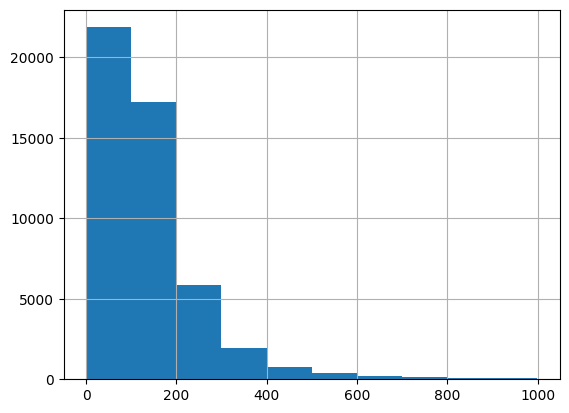

In [28]:
hist_price1 = df["price"][df["price"] < 1000].hist()
plt.show()

In [29]:
df[df["price"] > 1000]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0,None,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0,None,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,0,None,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,0,None,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,0,None,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,0,None,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0,None,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0,None,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0,None,1,349


###Removing wrong pricing

In [30]:
df = df[df["price"] < 1000]


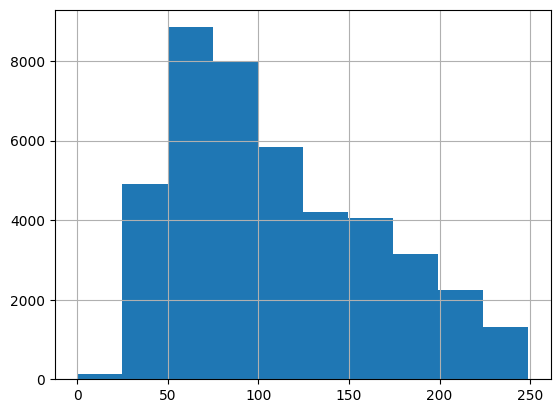

In [31]:
hist_price2 = df["price"][df["price"] < 250].hist()
plt.show()

In [32]:
df["price"].describe()


count    48597.000000
mean       140.237299
std        112.906258
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64

In [33]:
df['neighbourhood'].value_counts()


Williamsburg          3908
Bedford-Stuyvesant    3701
Harlem                2650
Bushwick              2463
Hell's Kitchen        1948
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

###Filtering

In [34]:

dfnh = df.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 200)


In [35]:

len(dfnh["neighbourhood"])

42029

###Grouping

In [36]:
df1 = df.groupby(["host_id"])
max(df1.size())

327

In [37]:

df1.size().value_counts().head()

1    32112
2     3317
3      945
4      358
5      167
dtype: int64

In [38]:
host_id_counts = df1["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host


(219517861, 219517861)

In [39]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,None,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,None,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,None,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,0,None,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,None,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,None,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,None,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,None,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,None,6,2


In [40]:
df['room_type'].value_counts()


Entire home/apt    25166
Private room       22275
Shared room         1156
Name: room_type, dtype: int64

In [41]:
rt_price = df.groupby("room_type")["price"].mean()
rt_price

room_type
Entire home/apt    192.932806
Private room        84.555196
Shared room         66.001730
Name: price, dtype: float64

In [42]:
df["minimum_nights"].describe()


count    48597.000000
mean         6.975019
std         20.275227
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [43]:
df.loc[(df.minimum_nights > 30), "minimum_nights"] = 30


In [44]:
df.loc[(df.minimum_nights > 30), "minimum_nights"] = 30


In [45]:
df["minimum_nights"].corr(df["price"])


0.04337529187353167

In [46]:
df["availability_365"].describe()


count    48597.000000
mean       112.367862
std        131.378673
min          0.000000
25%          0.000000
50%         44.000000
75%        225.000000
max        365.000000
Name: availability_365, dtype: float64

### Dropping irrelevant columns

In [47]:
df.drop(["latitude", "longitude"], axis=1, inplace=True)
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

<ipython-input-47-a30cab01b31b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["latitude", "longitude"], axis=1, inplace=True)
<ipython-input-47-a30cab01b31b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)


In [48]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,None,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,None,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,None,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,None,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,None,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,None,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,None,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,None,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,None,6,2


### Neighborhood Group Analysis

In [49]:
df['neighbourhood_group'].value_counts()


Manhattan        21448
Brooklyn         20037
Queens            5653
Bronx             1089
Staten Island      370
Name: neighbourhood_group, dtype: int64

In [50]:
ngrp_price = df.groupby("neighbourhood_group")["price"].mean()
ngrp_price

neighbourhood_group
Bronx             84.443526
Brooklyn         117.235564
Manhattan        177.366747
Queens            94.528038
Staten Island     96.148649
Name: price, dtype: float64

In [51]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,None,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,None,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,None,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,None,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,None,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,None,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,None,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,None,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,None,6,2


### Removing Null values

In [52]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 48597
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [53]:
df.drop('reviews_per_month', axis=1, inplace=True)

<ipython-input-53-bc578996b0b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('reviews_per_month', axis=1, inplace=True)


In [54]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [55]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


# Regression Analysis

In [56]:
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [57]:
df_onehot = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'],
                                prefix=['ng', 'nh', 'rt'], drop_first=True)

In [58]:
df


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


### Spliting of data

In [59]:
X = df_onehot.drop(['price'], axis=1)
Y = df_onehot['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)



## Linear Regression

In [60]:
reg_model = LinearRegression().fit(x_train, y_train)
acc = reg_model.score(x_train, y_train)
y_pred = reg_model.predict(x_test)
r2_sq=r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",rmse)
print("R-squared:", r2_sq)
print("Accuracy Score:", acc)


RMSE: 84.87148544000652
R-squared: 0.3862803049992466
Accuracy Score: 0.3832313349536173


###Decision Tree

In [61]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train, y_train)
accdt = dtmodel.score(x_train, y_train)
y_preddt = dtmodel.predict(x_test)
r2_sqdt=r2_score(y_test,y_preddt)
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_preddt))
print("RMSE:",rmse1)
print("R-squared:", r2_sqdt)
print("Accuracy Score:", accdt)


RMSE: 114.58625671641136
R-squared: -0.11869453944801034
Accuracy Score: 0.9958397341242238


 ## Random Forest


In [62]:
rfmodel = RandomForestRegressor(n_estimators=150)
rfmodel.fit(x_train, y_train)
accrf = rfmodel.score(x_train, y_train)
y_predrf = rfmodel.predict(x_test)
r2_sqrf=r2_score(y_test,y_predrf)
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_predrf))
print("RMSE:",rmse2)
print("R-squared:", r2_sqrf)
print("Accuracy Score:", accrf)

RMSE: 82.47535334692449
R-squared: 0.420444777741823
Accuracy Score: 0.9170031684242814


## Gradient Boosting

In [63]:
gbmodel = GradientBoostingRegressor(n_estimators=574, learning_rate=0.1, max_depth=3)
gbmodel.fit(x_train, y_train)
y_predgb = gbmodel.predict(x_test)
r2_sqgb = r2_score(y_test, y_predgb)
gb_acc=gbmodel.score(x_train, y_train)
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_predgb))
print("RMSE:",rmse3)
print("R-squared:", r2_sqgb)
print("Accuracy Score:", gb_acc)


RMSE: 80.7059770390563
R-squared: 0.445044892386496
Accuracy Score: 0.49407028138748654


## Xgboost Regressor

In [64]:
xgbmodel = xgb.XGBRegressor(n_estimators=453, max_depth=3)
xgbmodel.fit(x_train, y_train)
y_pred_xgb = xgbmodel.predict(x_test)
acc_xgb = xgbmodel.score(x_test, y_test)
r2_sqxgb=r2_score(y_test,y_pred_xgb)
rmse4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
print("RMSE:",rmse4)
print("R-squared:", r2_sqxgb)
print("Accuracy Score:", acc_xgb)

RMSE: 80.36715064069337
R-squared: 0.4496948263469488
Accuracy Score: 0.4496948263469488


### Bayesian Ridge

In [65]:
br_model = BayesianRidge()
br_model.fit(x_train, y_train)
br_acc = br_model.score(x_train, y_train)
y_pred_br = br_model.predict(x_test)
r2_br = r2_score(y_test, y_pred_br)
rmse5 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_br))
print("RMSE:",rmse5)
print("R-squared:", r2_br)
print("Accuracy Score:", br_acc)

RMSE: 84.8303339946207
R-squared: 0.3868753064794972
Accuracy Score: 0.3814240098307422


#Model Comparision

In [66]:
model_scores_data = [
    {"Model": "Linear Regression", "R-squared": r2_sq, "Accuracy Score": acc,"Root Mean Square Error":rmse},
    {"Model": "Decision Tree", "R-squared": r2_sqdt, "Accuracy Score": accdt,"Root Mean Square Error":rmse1},
    {"Model": "Random Forest", "R-squared": r2_sqrf, "Accuracy Score": accrf,"Root Mean Square Error":rmse2},
    {"Model": "Gradient Boosting", "R-squared": r2_sqgb, "Accuracy Score": gb_acc,"Root Mean Square Error":rmse3},
    {"Model": "XGBoost", "R-squared": r2_sqxgb, "Accuracy Score": acc_xgb,"Root Mean Square Error":rmse4},
    {"Model": "Bayesian Ridge", "R-squared": r2_br, "Accuracy Score": br_acc,"Root Mean Square Error":rmse5}
]
model_scores = pd.DataFrame(model_scores_data)

In [67]:
print(model_scores)

               Model  R-squared  Accuracy Score  Root Mean Square Error
0  Linear Regression   0.386280        0.383231               84.871485
1      Decision Tree  -0.118695        0.995840              114.586257
2      Random Forest   0.420445        0.917003               82.475353
3  Gradient Boosting   0.445045        0.494070               80.705977
4            XGBoost   0.449695        0.449695               80.367151
5     Bayesian Ridge   0.386875        0.381424               84.830334


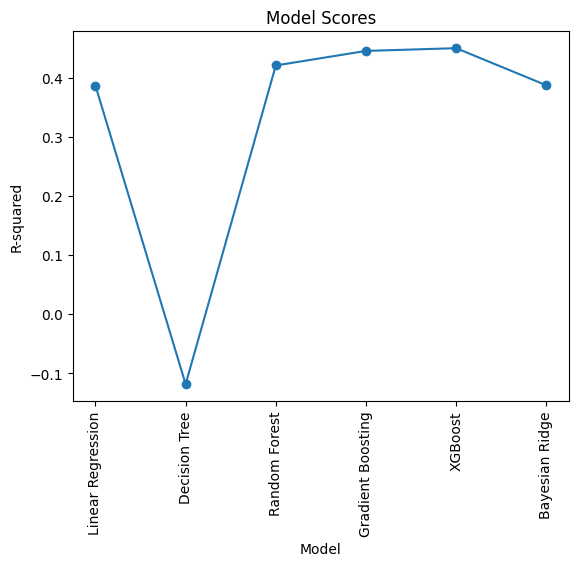

In [68]:
plt.plot(model_scores['Model'], model_scores['R-squared'], marker='o')
plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=90)
plt.show()

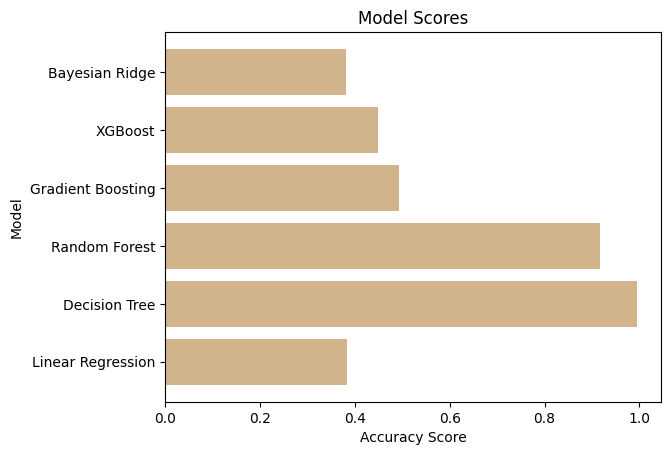

In [69]:
y = model_scores['Model']
x = model_scores['Accuracy Score']
plt.barh(y, x, color='tan')
plt.title('Model Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.show()

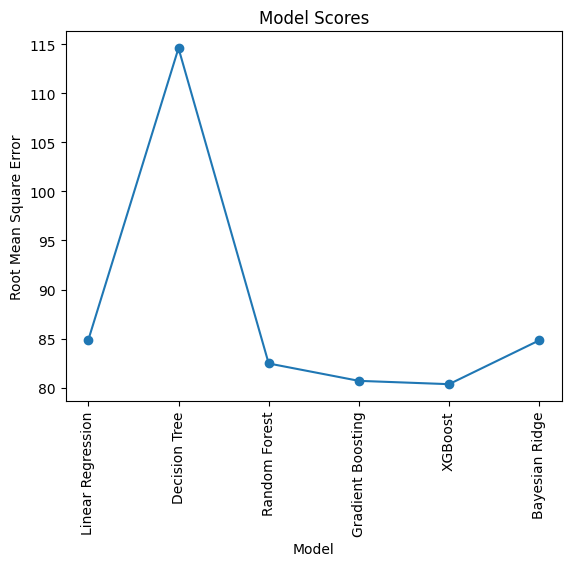

In [70]:
plt.plot(model_scores['Model'], model_scores['Root Mean Square Error'], marker='o')
plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Root Mean Square Error')
plt.xticks(rotation=90)
plt.show()